<a href="https://colab.research.google.com/github/seon-pegado/Sem-V/blob/main/DMW/EXP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# 1) IRIS FLOWER CLASSIFICATION :

DECISION TREE : 
Accuracy = 1.0
Confusion Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


NAIVE BAEYES : 
Accuracy = 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]




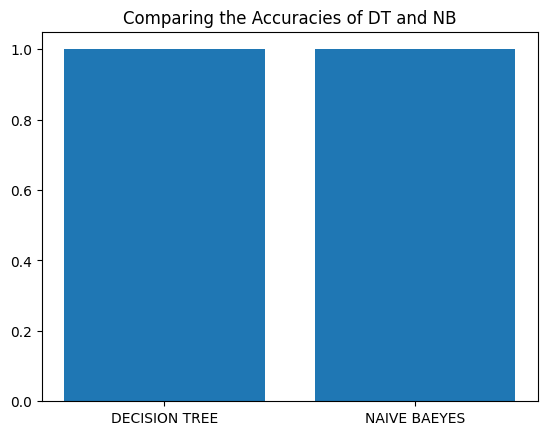

K FOLD CROSS VALIDATION
Decision Tree:
[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]
Naive Baeyes:
[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]


RANDOM FOREST CLASSIFIER
1.0


In [11]:
iris = sns.load_dataset('iris')

#Split the dataframe in X and y
X = iris.drop('species', axis = 1)
y  = iris['species']

# Unique vlaues in  the label
np.unique(iris['species'])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

# Decision Tree
print("DECISION TREE : ")
clf_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf_DT.fit(X_train, y_train)
DT_acc1 = clf_DT.score(X_test, y_test)
print(f'Accuracy = {DT_acc1}')

y_preds = clf_DT.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix: ")
print(conf_matrix, end='\n\n\n')

# Naive Bayes
print("NAIVE BAEYES : ")
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
NB_acc1 = clf_NB.score(X_test, y_test)
print(f'Accuracy = {NB_acc1}')

y_preds = clf_NB.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)
print('Confusion Matrix:')
print(conf_matrix, end='\n\n\n')

# Bar plot comparing DT and NB accuracy
plt.subplots(1)
plt.title('Comparing the accuarcy of DT and NB')
plt.bar(['DECISION TREE', 'NAIVE BAEYES'], [DT_acc1, NB_acc1])
plt.title("Comparing the Accuracies of DT and NB")
plt.show()


# K fold cross validation
print('K FOLD CROSS VALIDATION')
KF_acc_DT = cross_val_score(clf_DT, X, y, cv = 10, n_jobs = 1)
KF_acc_NB = cross_val_score(clf_NB, X, y, cv = 10, n_jobs = 1)
print('Decision Tree:')
print(KF_acc_DT)
print('Naive Baeyes:')
print(KF_acc_NB, end = '\n\n\n')

# Random Forest
print('RANDOM FOREST CLASSIFIER')
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
rf_acc1 = clf.score(X_test, y_test)
print(f'Accuarcy = {rf_acc1}')

# 2) Airplane Passenger Satisfaction  :


DECISION TREE : 
Accuracy = 0.9481152565278247
Confusion Matrix: 
[[11116   539]
 [  536  8528]]




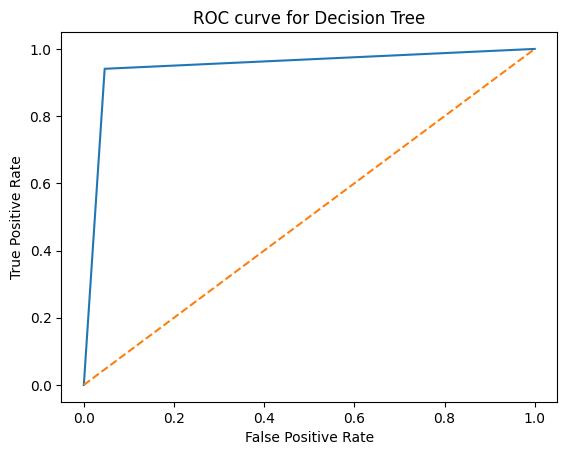

Area under Receiver Operating Characteristic Curve = 0.9473093570180949


NAIVE BAEYES : 
Accuracy = 0.804478980645784
Confusion Matrix:
[[9453 2202]
 [1849 7215]]




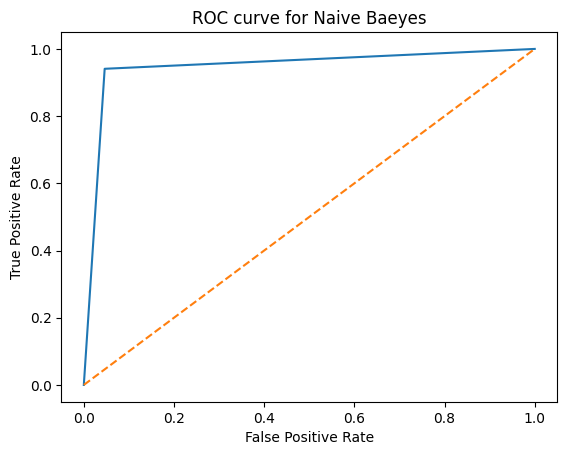

Area under Receiver Operating Characteristic Curve = 0.9473093570180949




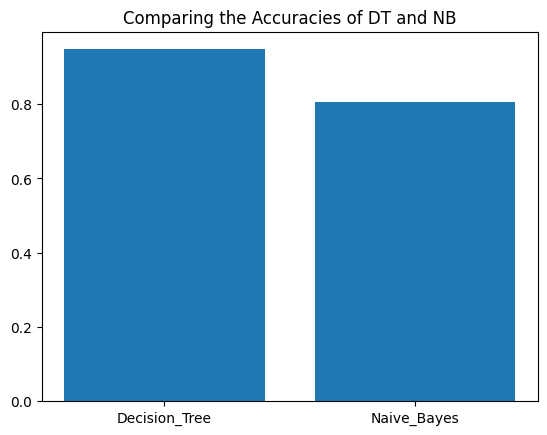

K FOLD CROSS VALIDATION
Decision Tree:
[0.94594595 0.94517375 0.94295367 0.94787645 0.94874023 0.94912636
 0.94680954 0.94738874 0.94806448 0.94487885]
Naive Baeyes:
[0.8019305  0.80839768 0.80637066 0.80521236 0.79872575 0.80480741
 0.80538662 0.81523313 0.81504006 0.81764649]


RANDOM FOREST CLASSIFIER
Accuarcy = 0.9632704281094647


In [17]:
df2 = pd.read_csv('/content/drive/MyDrive/Data/Airplane_passenger_satisfaction.csv')

# Preprocessing
df2['Gender'] = LabelEncoder().fit_transform(df2['Gender'])
df2['Customer Type'] = LabelEncoder().fit_transform(df2['Customer Type'])
df2['Type of Travel'] = LabelEncoder().fit_transform(df2['Type of Travel'])
df2['Class'] = LabelEncoder().fit_transform(df2['Class'])
df2['satisfaction'] = LabelEncoder().fit_transform(df2['satisfaction'])

df2 = df2.dropna()

# Split the dataframe in X and y
X = df2.drop('satisfaction', axis = 1)
y = df2['satisfaction']

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Decision Tree
print("DECISION TREE : ")
clf_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf_DT.fit(X_train, y_train)
DT_acc2 = clf_DT.score(X_test, y_test)
print(f'Accuracy = {DT_acc2}')

y_preds = clf_DT.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix: ")
print(conf_matrix, end='\n\n\n')

# ROC Curve :
y_score = clf_DT.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_score, pos_label = 1)
plt.subplots(1)
plt.plot(fpr, tpr)
plt.plot([0,1], ls = '--')
plt.title('ROC curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'Area under Receiver Operating Characteristic Curve = {roc_auc_score(y_test, y_score)}', end = '\n\n\n')

# Naive Bayes
print("NAIVE BAEYES : ")
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
NB_acc2 = clf_NB.score(X_test, y_test)
print(f'Accuracy = {NB_acc2}')

y_preds = clf_NB.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)
print('Confusion Matrix:')
print(conf_matrix, end='\n\n\n')

# ROC Curve:
y_score = clf_DT.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_score, pos_label = 1)
plt.subplots(1)
plt.plot(fpr, tpr)
plt.plot([0,1], ls = '--')
plt.title('ROC curve for Naive Baeyes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'Area under Receiver Operating Characteristic Curve = {roc_auc_score(y_test, y_score)}', end = '\n\n\n')

# Bar Plot
plt.subplots(1)
plt.bar(['Decision_Tree', 'Naive_Bayes'], [DT_acc2, NB_acc2], )
plt.title("Comparing the Accuracies of DT and NB")
plt.show()

# K fold cross validation
print('K FOLD CROSS VALIDATION')
KF_acc_DT = cross_val_score(clf_DT, X, y, cv = 10, n_jobs = 1)
KF_acc_NB = cross_val_score(clf_NB, X, y, cv = 10, n_jobs = 1)
print('Decision Tree:')
print(KF_acc_DT)
print('Naive Baeyes:')
print(KF_acc_NB, end = '\n\n\n')

# Random Forest
print('RANDOM FOREST CLASSIFIER')
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
rf_acc2 = clf.score(X_test, y_test)
print(f'Accuarcy = {rf_acc2}')

# 3) Diabetes Classification :






DECISION TREE : 
Accuracy = 0.7012987012987013
Confusion Matrix: 
[[80 23]
 [23 28]]




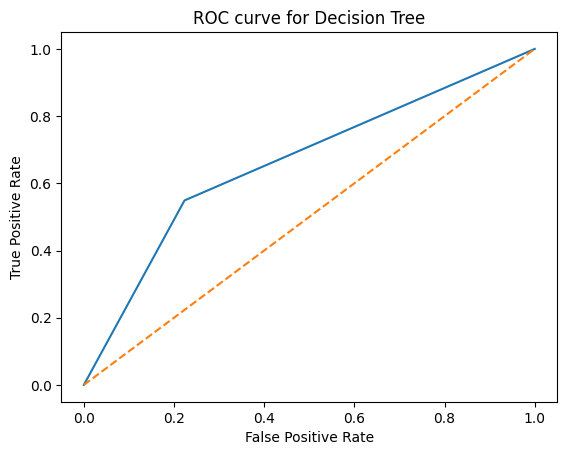

Area under Receiver Operating Characteristic Curve = 0.6628593184846754


NAIVE BAEYES : 
Accuracy = 0.7597402597402597
Confusion Matrix:
[[87 16]
 [21 30]]




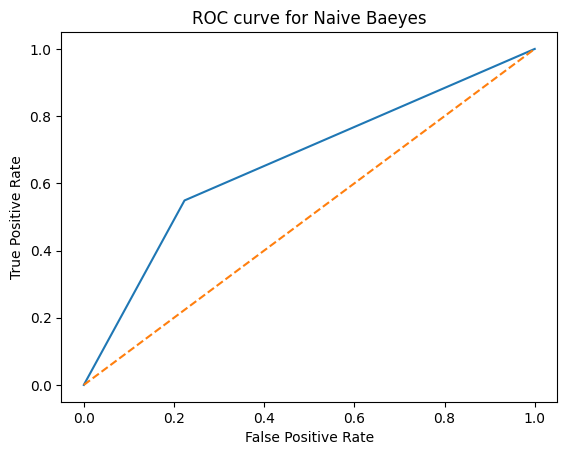

Area under Receiver Operating Characteristic Curve = 0.6628593184846754




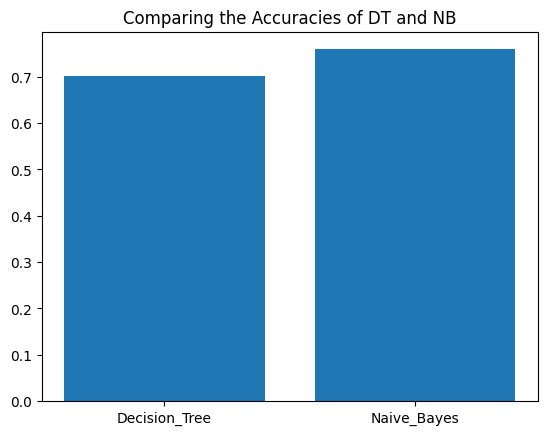

K FOLD CROSS VALIDATION
Decision Tree:
[0.67532468 0.68831169 0.64935065 0.61038961 0.7012987  0.72727273
 0.79220779 0.75324675 0.69736842 0.65789474]
Naive Baeyes:
[0.72727273 0.75324675 0.79220779 0.71428571 0.71428571 0.79220779
 0.76623377 0.80519481 0.72368421 0.77631579]


RANDOM FOREST CLASSIFIER
Accuarcy = 0.7857142857142857


In [18]:
df3 = pd.read_csv('/content/drive/MyDrive/Data/Diabetes Binary Classification.csv')
df3.head()

# Splitting the data in X and y
X = df3.drop('Class variable (0 or 1)', axis = 1)
y = df3['Class variable (0 or 1)']

# Train Test split
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)

# Decision Tree
print("DECISION TREE : ")
clf_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf_DT.fit(X_train, y_train)
DT_acc3 = clf_DT.score(X_test, y_test)
print(f'Accuracy = {DT_acc3}')

y_preds = clf_DT.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix: ")
print(conf_matrix, end='\n\n\n')

# ROC Curve:
y_score = clf_DT.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_score, pos_label = 1)
plt.subplots(1)
plt.plot(fpr, tpr)
plt.plot([0,1], ls = '--')
plt.title('ROC curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'Area under Receiver Operating Characteristic Curve = {roc_auc_score(y_test, y_score)}', end = '\n\n\n')

# Naive Bayes
print("NAIVE BAEYES : ")
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
NB_acc3 = clf_NB.score(X_test, y_test)
print(f'Accuracy = {NB_acc3}')

y_preds = clf_NB.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)
print('Confusion Matrix:')
print(conf_matrix, end='\n\n\n')

# ROC Curve:
y_score = clf_DT.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_score, pos_label = 1)
plt.subplots(1)
plt.plot(fpr, tpr)
plt.plot([0,1], ls = '--')
plt.title('ROC curve for Naive Baeyes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'Area under Receiver Operating Characteristic Curve = {roc_auc_score(y_test, y_score)}', end = '\n\n\n')

# Bar Plot
plt.subplots(1)
plt.bar(['Decision_Tree', 'Naive_Bayes'], [DT_acc3, NB_acc3], )
plt.title("Comparing the Accuracies of DT and NB")
plt.show()

# K fold cross validation
print('K FOLD CROSS VALIDATION')
KF_acc_DT = cross_val_score(clf_DT, X, y, cv = 10, n_jobs = 1)
KF_acc_NB = cross_val_score(clf_NB, X, y, cv = 10, n_jobs = 1)
print('Decision Tree:')
print(KF_acc_DT)
print('Naive Baeyes:')
print(KF_acc_NB, end = '\n\n\n')

# Random Forest
print('RANDOM FOREST CLASSIFIER')
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
rf_acc3 = clf.score(X_test, y_test)
print(f'Accuarcy = {rf_acc3}')

# 4) Brain Stoke Prediction :

DECISION TREE : 
Accuracy = 0.8248847926267281
Confusion Matrix: 
[[174  17]
 [ 21   5]]




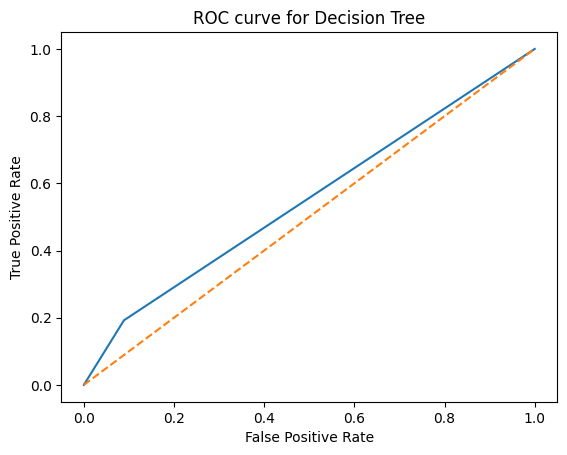

Area under Receiver Operating Characteristic Curve = 0.551651228352799


NAIVE BAEYES : 
Accuracy = 0.8433179723502304
Confusion Matrix:
[[175  16]
 [ 18   8]]




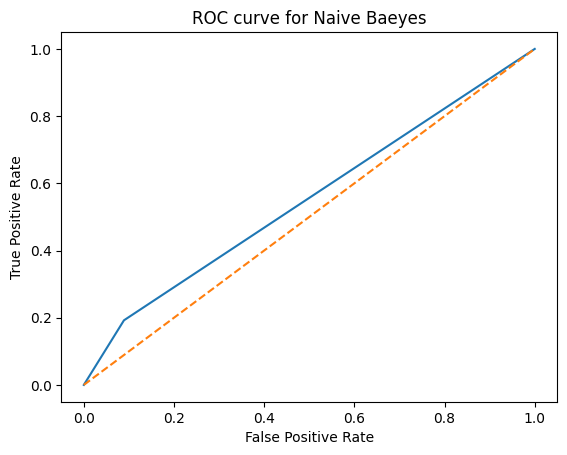

Area under Receiver Operating Characteristic Curve = 0.551651228352799




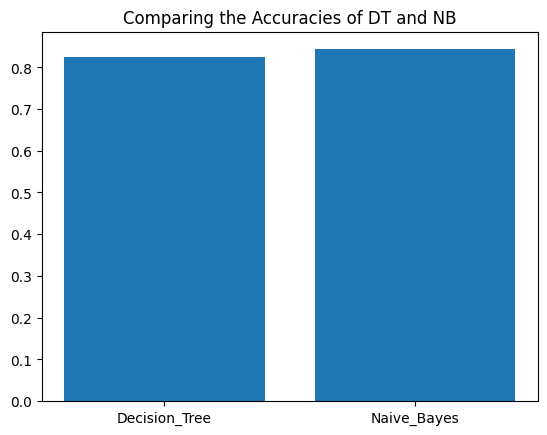

K FOLD CROSS VALIDATION
Decision Tree:
[0.87155963 0.89908257 0.82568807 0.87155963 0.8440367  0.85185185
 0.86111111 0.82407407 0.88888889 0.83333333]
Naive Baeyes:
[0.86238532 0.87155963 0.83486239 0.88073394 0.8440367  0.85185185
 0.85185185 0.89814815 0.85185185 0.85185185]


RANDOM FOREST CLASSIFIER
Accuarcy = 0.880184331797235


In [19]:
df4 = pd.read_csv('/content/drive/MyDrive/Data/brain_stoke.csv')

# Preprocessing
df4['gender'] = LabelEncoder().fit_transform(df4['gender'])
df4['ever_married'] = LabelEncoder().fit_transform(df4['ever_married'])
df4['work_type'] = LabelEncoder().fit_transform(df4['work_type'])
df4['Residence_type'] = LabelEncoder().fit_transform(df4['Residence_type'])
df4['smoking_status'] = LabelEncoder().fit_transform(df4['smoking_status'])
df4['age'] = df4['age'].replace('*82', '82')
df4['age'].astype(int)
df4 = df4.dropna()
# splitting the data in X and y
X = df4.drop('stroke', axis = 1)
y = df4['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Decision Tree
print("DECISION TREE : ")
clf_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf_DT.fit(X_train, y_train)
DT_acc4 = clf_DT.score(X_test, y_test)
print(f'Accuracy = {DT_acc4}')

y_preds = clf_DT.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix: ")
print(conf_matrix, end='\n\n\n')

# ROC Curve:
y_score = clf_DT.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_score, pos_label = 1)
plt.subplots(1)
plt.plot(fpr, tpr)
plt.plot([0,1], ls = '--')
plt.title('ROC curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'Area under Receiver Operating Characteristic Curve = {roc_auc_score(y_test, y_score)}', end = '\n\n\n')

# Naive Bayes
print("NAIVE BAEYES : ")
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
NB_acc4 = clf_NB.score(X_test, y_test)
print(f'Accuracy = {NB_acc4}')

y_preds = clf_NB.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)
print('Confusion Matrix:')
print(conf_matrix, end='\n\n\n')

# ROC Curve:
y_score = clf_DT.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_score, pos_label = 1)
plt.subplots(1)
plt.plot(fpr, tpr)
plt.plot([0,1], ls = '--')
plt.title('ROC curve for Naive Baeyes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'Area under Receiver Operating Characteristic Curve = {roc_auc_score(y_test, y_score)}', end = '\n\n\n')

# Bar Plot
plt.subplots(1)
plt.bar(['Decision_Tree', 'Naive_Bayes'], [DT_acc4, NB_acc4], )
plt.title("Comparing the Accuracies of DT and NB")
plt.show()

# K fold cross validation
print('K FOLD CROSS VALIDATION')
KF_acc_DT = cross_val_score(clf_DT, X, y, cv = 10, n_jobs = 1)
KF_acc_NB = cross_val_score(clf_NB, X, y, cv = 10, n_jobs = 1)
print('Decision Tree:')
print(KF_acc_DT)
print('Naive Baeyes:')
print(KF_acc_NB, end = '\n\n\n')

# Random Forest
print('RANDOM FOREST CLASSIFIER')
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
rf_acc4 = clf.score(X_test, y_test)
print(f'Accuarcy = {rf_acc4}')

# 5) Heart Disease Prediction :

DECISION TREE : 
Accuracy = 0.7049180327868853
Confusion Matrix: 
[[22  9]
 [ 9 21]]




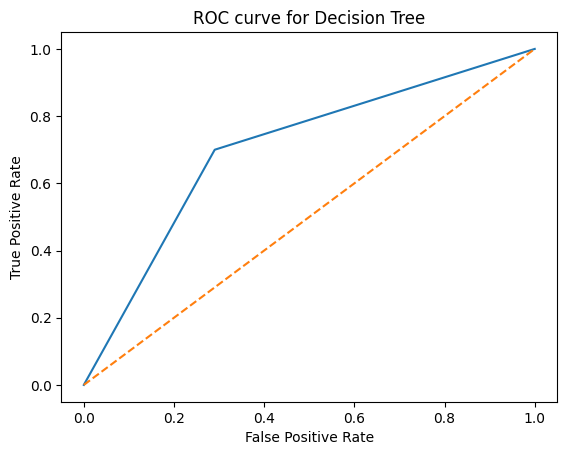

Area under Receiver Operating Characteristic Curve = 0.7048387096774194


NAIVE BAEYES : 
Accuracy = 0.8032786885245902
Confusion Matrix:
[[24  7]
 [ 5 25]]




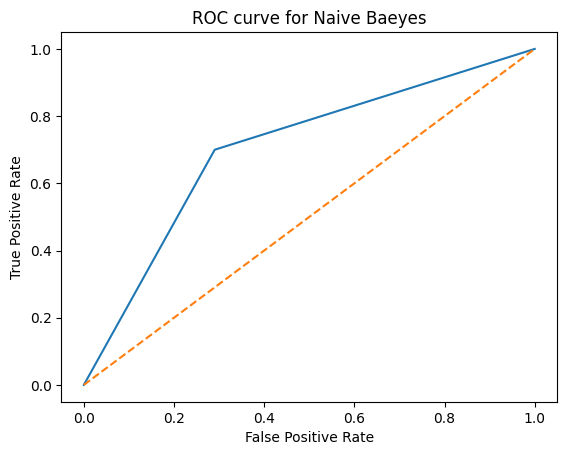

Area under Receiver Operating Characteristic Curve = 0.7048387096774194




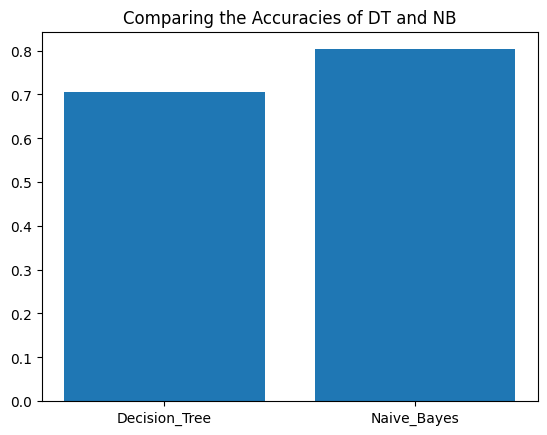

K FOLD CROSS VALIDATION
Decision Tree:
[0.70967742 0.80645161 0.90322581 0.83333333 0.8        0.8
 0.63333333 0.83333333 0.76666667 0.76666667]
Naive Baeyes:
[0.80645161 0.80645161 0.87096774 0.9        0.8        0.73333333
 0.9        0.8        0.73333333 0.7       ]


RANDOM FOREST CLASSIFIER
Accuarcy = 0.8524590163934426


In [20]:
df5 = pd.read_csv('/content/drive/MyDrive/Data/heart-disease.csv')

# Splitting the data in X and y
X = df5.drop('target', axis = 1)
y = df5['target']

# Train Test Split
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)

# Decision Tree
print("DECISION TREE : ")
clf_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf_DT.fit(X_train, y_train)
DT_acc5 = clf_DT.score(X_test, y_test)
print(f'Accuracy = {DT_acc5}')

y_preds = clf_DT.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix: ")
print(conf_matrix, end='\n\n\n')

# ROC Curve:
y_score = clf_DT.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_score, pos_label = 1)
plt.subplots(1)
plt.plot(fpr, tpr)
plt.plot([0,1], ls = '--')
plt.title('ROC curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'Area under Receiver Operating Characteristic Curve = {roc_auc_score(y_test, y_score)}', end = '\n\n\n')

# Naive Bayes
print("NAIVE BAEYES : ")
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
NB_acc5 = clf_NB.score(X_test, y_test)
print(f'Accuracy = {NB_acc5}')

y_preds = clf_NB.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)
print('Confusion Matrix:')
print(conf_matrix, end='\n\n\n')

# ROC Curve:
y_score = clf_DT.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_score, pos_label = 1)
plt.subplots(1)
plt.plot(fpr, tpr)
plt.plot([0,1], ls = '--')
plt.title('ROC curve for Naive Baeyes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'Area under Receiver Operating Characteristic Curve = {roc_auc_score(y_test, y_score)}', end = '\n\n\n')

# Bar Plot
plt.subplots(1)
plt.bar(['Decision_Tree', 'Naive_Bayes'], [DT_acc5, NB_acc5], )
plt.title("Comparing the Accuracies of DT and NB")
plt.show()

# K fold cross validation
print('K FOLD CROSS VALIDATION')
KF_acc_DT = cross_val_score(clf_DT, X, y, cv = 10, n_jobs = 1)
KF_acc_NB = cross_val_score(clf_NB, X, y, cv = 10, n_jobs = 1)
print('Decision Tree:')
print(KF_acc_DT)
print('Naive Baeyes:')
print(KF_acc_NB, end = '\n\n\n')

# Random Forest
print('RANDOM FOREST CLASSIFIER')
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
rf_acc5 = clf.score(X_test, y_test)
print(f'Accuarcy = {rf_acc5}')

# Comparative Plot for DT and NB for all 5 dataset :



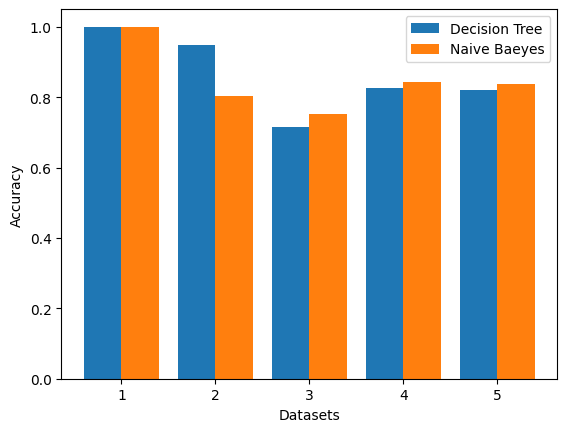

In [ ]:
i = np.arange(5)
width = 0.40
fig, ax = plt.subplots()
DT = ax.bar(i, [DT_acc1, DT_acc2, DT_acc3, DT_acc4, DT_acc5], width, label = 'Decision Tree')
NB = ax.bar(i+width, [NB_acc1, NB_acc2, NB_acc3, NB_acc4, NB_acc5], width, label = 'Naive Baeyes')
ax.set_xticks(i + width/2)
ax.set_xticklabels([1,2,3,4,5])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Datasets')
plt.legend()
plt.show();